## PROBABILIDAD (I): Conceptos básicos y cálculo frecuencial

Para la primera parte de la probabilida vamos a centrarnos en los datos del Titanic, y a emplear nuestras bibliotecas favoritas:

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.integrate import quad 

df_titanic = pd.read_csv("./data/titanic.csv")

En esta sesión vamos a empezar a engarzar ya la estadística inferencial y nuestro próximo objetivo final: tomar decisiones a partir de los datos para situaciones "nuevas" no necesariamente contempladas anteriormente.

Vamos a querer saber no ya cuanta gente murió en el Titanic o su ratio de supervivencia, sino si de repente nos dicen que hubo un pasajero X no contemplado en nuestros datos, ¿podríamos decir si murió o no?¿De qué puerto salió?¿Viajaba en primera o en tercera? Claro para hechos pasados parece menos interesante, salvo que tu campo sea precisamente el estudio del pasado.   

Pero, si has hecho el EDA sobre el precio de las casas en los últimos 10 años, lo que te interesará es poder usar esos datos para poder decidir dónde comprar en los próximos tres años, por ejemplo. ¿Y como se responde a eso? De forma definitiva e inequívoca es imposible, pero a partir de los datos que has usado puedes inferir (si con estadística inferencial) una serie de características de lo que serán esas casas en los próximos tres años, cuánto son de fiables tus datos y tener una idea de que zonas tienen mejores posibilidades de ser buena inversión y cuáles no. Es decir, **estimar la probabilidad** para cada zona de que sean buenas o no o cuánto de buenas para la inversión y sobre eso tomar una decisión. Y ahí es dónde entra la probabilidad como herramienta para tomar decisiones antes situaciones cuya complejidad nos impide utilizar fórmulas matemáticas precisas.


### Preguntas guía  

Para guiarnos en esta sesión, vamos a plantearos algunas preguntas a resolver con nuestros datos:  

1. ¿Cuál es la probabilidad de que una persona elegida al azar sobreviviese en el Titanic?
2. ¿Cuál es la probabilidad de que una persona elegida al azar se embarcase en Queenstown?
3. ¿Cuál es la probabilidad de que una persona elegida al azar fuese hombre o viajese en primera clase?
4. ¿Cuál es la probabilidad de que una persona elegida al azar viajese en primera clase y viajase sola?
5. ¿Cuál es la probabilidad de que una persona elegida al azar se salvase y viajase en tercera clase? 

Lo primero será definir o formalizar el concepto de rpobabilidad con el que hemos jugado sin profundizar.

### ¿Qué es la probabilidad?

*Formalmente*: **La [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) mide la mayor o menor posibilidad de que se dé un determinado resultado (suceso o evento) cuando se realiza un experimento aleatorio.**

Como experimentos aleatorios nos entran en la cabeza fácilmente la lotería o tirar un dado de varias caras. Pero un experimento aleatorio también es escoger una persona al azar de entre los pasajeros del titanic (al azar == no intencionadamente esa persona en concreto) y también (aunque ahora parezca contradictorio), escoger una persona al azar aunque con características determinadas [escoger una pasajero del Titanic de entre los que embarcaron en Southampton y tenían más de 20 años, siempre que una vez seleccionados los pasajeros con esas características escogieramos "sin mirar al pasajero en cuestión].  

En este sentido nuestras preguntas entran dentro de lo que denominaríamos un experimento aleatorio.  

Para **calcular la probabilidad** de un evento se toma en cuenta **todos los casos posibles** de ocurrencia del mismo; es decir, de cuántas formas puede ocurrir determinada situación. Los **casos favorables** de ocurrencia de un evento serán los que cumplan con la condición que estamos buscando. La *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* toma valores entre 0 y 1 (o expresados en tanto por ciento, entre 0% y 100%). Esto es lo que se denomina un cálculo frecuencial y es lo que se conoce como **regla de Laplace** [Para que tengas un culturilla saludable]:

$$p(A) = \frac{favorables}{posibles}$$


Con esto ya estamos en disposición de poder dar contestación a nuestras dos primeras preguntas:

Para la primera preguntas buscasmos el número de casos favorables (pasajeros que sobrevivieron) frente al total de pasajeros: 

In [2]:
casos_favorables =len(df_titanic.loc[df_titanic["alive"] == "yes"]) # Casos favorables: el número de personas que sobrevivieron
casos_totales = len(df_titanic)
print("p(sobrevivir de una persona elegida al azar) = ", casos_favorables/casos_totales)

p(sobrevivir de una persona elegida al azar) =  0.3838383838383838


Y también, aquí es donde tenemos que tener en cuenta nuestros intervalos de confianza y demás, porque debemos partir del caso de que nosotros trabajamos con los datos muestrales, con lo que nuestras probabilidades obtenidas con muestras deberían ser consideradas dentro de un rango (pero esto no lo vamos a respetar, life is hard...)  

La segunda pregunta se resolvería de forma análoga:

In [3]:
casos_favorables =len(df_titanic.loc[df_titanic["embark_town"] == "Queenstown"]) # Casos favorables: el número de personas que embarcaron en Queenstown
casos_totales = len(df_titanic)
print("p(Queenstown de una persona elegida al azar) = ", casos_favorables/casos_totales)

p(Queenstown de una persona elegida al azar) =  0.08641975308641975


Para que pienses un poco, ¿se vería afectado este cálculo si en vez de partir de todos los datos, la población, lo hacemos de una muestra?

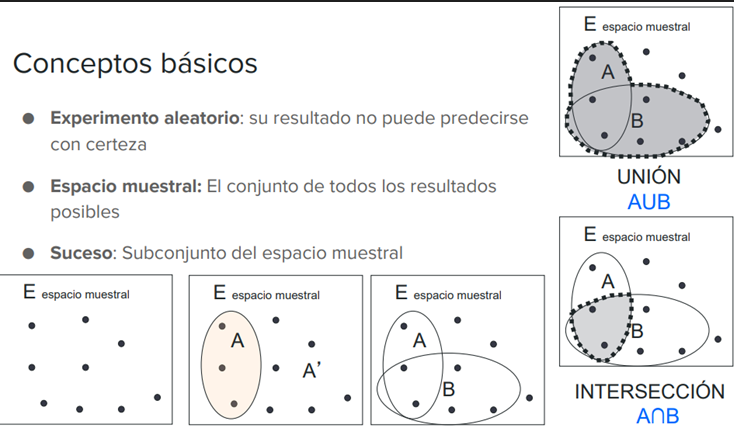

### Espacio muestral

El **espacio muestral** es el conjunto de todos los resultados posibles en un "experimento" aleatorio:
1. Caso de lanzar un dado de seis caras UNA vez. El espacio muestral es: $S= \{1,2,3,4,5,6\}$
2. Caso de lanzar una moneda UNA vez. El espacio muestral es: $S = \{cara, cruz\}$
3. Caso de lanzar una moneda DOS veces seguidas. El espacio muestral es: $S = \{(cara,cara),(cara,cruz),(cruz,cara),(cruz,cruz)\}$ 
3. Caso de escojer una persona al azar del Titanic para ver si sobrevivió... Piénsalo...

No, no es $S=\{sobrevivió, murió\}$

Aunque pueda parecerlo por los ejemplos anteriores el espacio muestral en el caso de la supervivencia del titanic son todos los valores posibles y en ese caso como estamos escogiendo un pasajero habrá tantos casos posibles como pasajeros (fijate en el caso de lanzar dos veces una moneda, el resultado no es cara o cruz sino el combinado):  
$$S_{titanic} = \{sobrevivió, murió, murió, murió, sobrevivió,.....\} \; \text{así hasta los 891 de nuestro dataset}$$

Es decir el espacio muestral será:

In [4]:
df_titanic["alive"].str.replace("yes","sobrevivió").replace("no","murió").values

array(['murió', 'sobrevivió', 'sobrevivió', 'sobrevivió', 'murió',
       'murió', 'murió', 'murió', 'sobrevivió', 'sobrevivió',
       'sobrevivió', 'sobrevivió', 'murió', 'murió', 'murió',
       'sobrevivió', 'murió', 'sobrevivió', 'murió', 'sobrevivió',
       'murió', 'sobrevivió', 'sobrevivió', 'sobrevivió', 'murió',
       'sobrevivió', 'murió', 'murió', 'sobrevivió', 'murió', 'murió',
       'sobrevivió', 'sobrevivió', 'murió', 'murió', 'murió',
       'sobrevivió', 'murió', 'murió', 'sobrevivió', 'murió', 'murió',
       'murió', 'sobrevivió', 'sobrevivió', 'murió', 'murió',
       'sobrevivió', 'murió', 'murió', 'murió', 'murió', 'sobrevivió',
       'sobrevivió', 'murió', 'sobrevivió', 'sobrevivió', 'murió',
       'sobrevivió', 'murió', 'murió', 'sobrevivió', 'murió', 'murió',
       'murió', 'sobrevivió', 'sobrevivió', 'murió', 'sobrevivió',
       'murió', 'murió', 'murió', 'murió', 'murió', 'sobrevivió', 'murió',
       'murió', 'murió', 'sobrevivió', 'sobrevivió', 'muri

Cuando trabajamos con datasets (conjuntos de datos) podemos asimilar el espacio muestral a dicho dataset para cada una de las características que tiene cada elemento del dataset o para su combinado.

### Suceso

Un suceso es un subconjunto de un espacio muestral. Ejemplos de sucesos "sencillos" (subconjuntos de un único elemento):

1. En el caso de lanzar un dado... cada una de las caras que pueden salir. Es decir un suceso será "sacar un 4", otro "sacar un 1", etc
2. En el caso de lanzar una moneda, tendríamos dos sucesos sencillos ("sacar cara", "sacar cruz")

No todos los sucesos tienen por qué ser "sencillos". Piensa en el caso de lanzar una moneda dos veces seguidas, podemos definir el suceso sacar cara en alguna de las tiradas. ¿Como se definiría ese suceso?:

$$A_{sacar-cara} = \{(cara,cara),(cara,cruz),(cruz,cara)\}$$

[Los sucesos o eventos se denotan normalmente por las letras A, B, C, etc]

Y siguiendo la regla de Laplace, la probabilidad sería...

$$casos\ favorables = card(Suceso) = 3$$
$$casos\ posibles = card(Espacio Muestral) = 4$$
$$p(\text{sacar una cara lanzando una moneda dos veces}) = \dfrac{3}{4} = 0.75$$

Y en el caso del titanic, tenemos dos posibles Sucesos (que corresponden con los valores de la variable categórica): "Sobrevivir", "Morir". Pero ninguno es sencillo. Cuando se da el caso de que dos o más eventos o sucesos no pueden ocurrir a la vez, se dice que son ***mutuamente excluyentes*** y la suma de sus probabiliddes debe ser igual a la unidad (o al 100% si trabajamos con porcentajes).


#### Unión e interscción de sucesos 

* **Unión:** La unión de varios sucesos sencillos crea un evento compuesto que **ocurre si uno o más de los eventos ocurren** (es como un "OR"). La unión de $A$ y $B$ se escribe $A \cup B$ y significa "Ya sea $A$ o $B$, o ambos $A$ y $B$."

* **Intersección:** La intersección de dos o más eventos simples crea un evento compuesto que **ocurre sólo si ocurren todos los eventos simples** (es como un "AND"). La intersección de $A$ y $B$ se escribe $A \cap B$ y significa "$A$ y $B$."

Ojo, a partir de la definición anterior puede haber unión e intersección de cualquier tipo de suceso y la probabilidad siempre se puede calcular igual: cardinalidad del resultado dividida por cardinalidad total (casos favorables entre casos posibles)

Con esto ya casi podemos obtener la respuesta a nuestras tres últimas preguntas iniciales, pero antes un par de ejemplos para ilustrar los conceptos anteriores:

##### Ejemplo con monedas

Supongamos que tenemos el "experimento" lanzar una moneda dos veces seguidas. Recuerda que su espacio muestral era:

$$S_{sacar-cara} = \{(cara,cara),(cara,cruz),(cruz,cara),(cruz,cruz)\}\ \text{4 posibles casos}$$

Y dos sucesos:
$$ A = \text{sacar una sóla cara} = \{(cara,cruz),(cruz,cara)\} $$
$$ B = \text{sacar cruz la segunda vez} = \{(cruz,cruz), (cara,cruz)\}$$

Calculemos los sucesos unión e intersección y la probabilidad de cada uno: 

$$A \cup B = \{(cara,cruz),(cruz,cara),(cruz,cruz)\}\  \text{3 casos favorables}$$  

$$p(A \cup B) = \frac{3}{4} = 0.75$$

La probabilidad de "sacar una sóla cara o sacar cruz la segunda vez" es de 0.75

$$A \cap B = \{(cara,cruz)\}\ \text{1 solo caso favorable}$$


$$p(A \cap B) = \frac{1}{4} = 0.25$$

La probabilidad de "sacar una sóla cara y cruz la segunda vez" es de 0.25

##### Ejemplo con dos variables diferentes

Imagina que tu espacio muestral son 9 personas, de los cuales tienes 5 ciudadanos españoles (A), y 4 de pelo castaño (B).


![Captura de pantalla 2024-01-16 155250.png](<attachment:Captura de pantalla 2024-01-16 155250.png>)
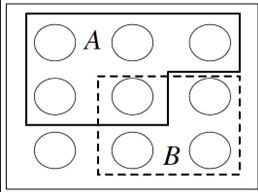

Escogiendo una persona al azar del espacio muestral:

* ¿Cuál es la probabilidad que sea un ciudadano español? $P(A)$ = 5/9 
* ¿Cuál es la probabilidad de que tenga el pelo castaño? $P(B)$ = 4/9 
* ¿Cuál es la probabilidad de que sea español o tenga el pelo castaño? $P(A \cup B)$ = 8/9
* ¿Cuál es la probabilidad de que sea español y tenga el pelo castaño? $P(A \cap B)$ = 1/9
* ¿Cuál es la probabilidad de que no sea español? $P(\sim{A})$ = 4/9 (también se le dice suceso complementario de A)

#### Aplicación a nuestro dataset

Y ahora podemos aplicarlo directamente a nuestro dataset y a las preguntas:

3. ¿Cuál es la probabilidad de que una persona elegida al azar fuese hombre o viajese en primera clase?


[Intuitivamente puede que ya tengas claro cómo contestar pero aquí lo vamos a hacer ligándolo a los conceptos que hemos visto] 

Se trataría de la unión de dos sucesos (fíjate en el "o" de la pregunta):

$$ A = \text{"Suceso persona elegida sea hombre"}$$
$$ B = \text{"Persona elegida viajaba en primera clase"}$$



En la siguiente sesión veremos como obtener las probabilidades sucesos unión a partir de sus sucesos originales pero por ahora lo que vamos a hacer es seguir aplicando casos favorables dividido por casos totales:

In [5]:
df_titanic.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')

In [6]:
# Como es una unión es como aplicar un "OR" a las dos condiciones:
ser_hombre = df_titanic.who == "Male"
viajar_primera = df_titanic["class"] == "First"
casos_favorables = len(df_titanic[ser_hombre | viajar_primera]) # Esto equivale a calcular la cardinalidad del conjunto unión
casos_totales = len(df_titanic)

print(f"p(ser hombre o viajar en primera) = {round(casos_favorables/casos_totales * 100,2)}%")

p(ser hombre o viajar en primera) = 24.24%


$$p(\text{de escoger a una persona y ser hombre o viajar en primera}) = p(A \cup B) = 24.24\%$$

4. ¿Cuál es la probabilidad de que una persona elegida al azar viajese en primera clase y viajase sola?

En este caso estamos hablando de la interesección de dos sucesos (fíjaete en el "y"):

$$A = \text{"viajar en primera clases"}$$
$$B = \text{"viajr sola"}$$

Buscamos:

$$p(\text{viajar en primera y viajar sola}) = p(A \cap B)$$

In [7]:
#Como es una intersección es aplicar un AND:
viajar_sola = df_titanic.alone
viajar_primera = df_titanic["class"] == "First"
casos_favorables = len(df_titanic[viajar_sola & viajar_primera]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

print(f"p(de escoger a una persona que viajara en primera, sola) = {round(casos_favorables/casos_totales * 100,2)}%")

p(de escoger a una persona que viajara en primera, sola) = 12.23%


$$p(\text{de escoger a una persona que viajara en primera, sola}) = p(A \cap B) = 12.23\%$$

Y para terminar: ¿Cuál es la probabilidad de que una persona elegida al azar se salvase y viajase en tercera clase? 

In [9]:
#Como es una intersección es aplicar un AND:
superviviente = df_titanic.alive == "yes"
viajar_tercera = df_titanic["class"] == "Third"
casos_favorables = len(df_titanic[superviviente & viajar_tercera]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

print(f"p(sobrevivir y viajar en tercera) = {round(casos_favorables/casos_totales * 100,2)}%")

p(sobrevivir y viajar en tercera) = 13.36%


$$p(\text{escoger a alguien que viajara en tercera y sobreviviera}) = p(A \cap B) = 13.36\%$$

Ojo NO hemos calculado la probabilidad de que sabiendo que viajaba en tercera se salvase. Eso es lo que se llama probabilidad condicionada y la veremos en la siguiente sesión. Pero para que no te quedes con las ganas y lo vayas pensando, sería (de nuevo considerando casos favorables y casos posibles):

In [10]:
# Al poner la condición de que viaja en tercera, lo que hacemos es reducir el espacio muestral y por tanto el denominador (al reducir la cardinalidad y por tanto el número de casos posibles)
casos_favorables = len(df_titanic[superviviente & viajar_tercera]) # Igual que antes son todos los que viajaban en tercera y se salvaron
casos_totales = len(df_titanic.loc[df_titanic["class"] == "Third"]) # Aquí está la diferencia, como sabemos que va en tercera, los casos posibles son solo los que van en tercera
print(f"p(habiendo viajado en tercera, sobrevivir) = p(sobrevir de los pasajeros de tercera) = {round(casos_favorables/casos_totales * 100,2)}%")

p(habiendo viajado en tercera, sobrevivir) = p(sobrevir de los pasajeros de tercera) = 24.24%


## PROBABILIDAD (II): Unión, intersección, probabilidad condicional e independencia

Existen otras formas de obtener las probabilidades de la unión de sucesos y de la intersección de sucesos que no son necesariamente aplicar la regla de Laplace. Empecemos con la unión.

### Obtención de probabilidades de unión de sucesos

Distinguimos dos casos, cuando los suscesos a unir son mutuamente excluyentes y cuando no. 

#### Unión de eventos mutuamente excluyentes

Recuerda que mutuamente excluyentes es que no pueden darse a la vez (matemáticamente la intersección de los conjuntos de sucesos excluyentes es el conjunto vacio porque no se pueden dar los dos eventos a la vez).

![Captura de pantalla 2024-01-16 160151.png](<attachment:Captura de pantalla 2024-01-16 160151.png>)

Si los eventos son *mutuamente excluyentes* entonces para calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de su unión, simplemente sumamos sus [probabilidades](https://es.wikipedia.org/wiki/Probabilidad) individuales.

$p(E \cup F) = p(E) + p(F)$

$p(E \cap F) = 0$


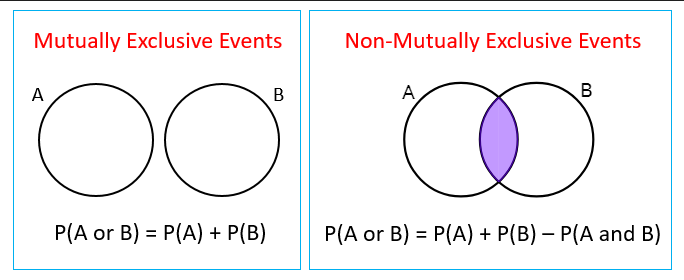

Como ejemplo, obtengamos la probabilidad del suceso "ser mujer o niño" al escoger al azar un pasajero del titanic. Siguiendo la fórmula anterior:

$$ E = \text{"ser mujer"}$$
$$ F = \text{"ser niño"}$$

$$ E \cup F = \text{"ser mujer o niño"}$$
$$ p(\text{ser mujer o niño}) = p(E \cup F) = p(E) + p(F)$$

Obtenemos $p(E)$ y $p(F)$ usando la aproximación frecuencial:

In [12]:
# p(E) frecuencia relativa de ser mujer:
p_E = df_titanic["who"].value_counts(normalize= True)["woman"]
p_F = df_titanic["who"].value_counts(normalize = True)["child"]
print("p(E) = ", p_E)
print("p(F) = ", p_F)

p(E) =  0.3041526374859708
p(F) =  0.0931537598204265


Y ahora la probabilidad de la unión $p(E \cup F)$ como la suma:

In [13]:
p_E_U_F = p_E + p_F
print("p(escoger una pajero que sea mujer o niño) = p(E U F) = ", p_E_U_F)

p(escoger una pajero que sea mujer o niño) = p(E U F) =  0.39730639730639733


Y comprobamos haciendo un calculo frecuencial del suceso combinado como lo hicimos anteriormente, al ser unión es un or de las condiciones:

In [14]:
casos_favorables = len(df_titanic.loc[(df_titanic.who == "child") | (df_titanic.who == "woman")])
casos_totales = len(df_titanic)
print(casos_favorables/casos_totales)

0.39730639730639733



#### Unión de eventos que no son mutuamente excluyentes
Si los eventos no son *mutuamente excluyentes* entonces debemos corregir la fórmula anterior para incluir el efecto de la superposición de los eventos. Esta superposición se da en el lugar de la *intersección* de los eventos; por lo tanto la formula para calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de estos eventos es:

$p(E \cup F) = p(E) + p(F) - p(E \cap F)$

##### Ejemplo

Volviendo al Titanic, pensemos en obtener la probabilidad de que un pasajero al azar "sobreviviese o viajase solo". Ahora los sucesos no son excluyentes ya que hubo pasajeros que viajaban sólos y sobrevivieron. Usando la formula:


$p(E) = p(\text{sobrevivir})$:

In [15]:
casos_favorables = len(df_titanic.loc[df_titanic.alive == "yes"])
casos_totales = len(df_titanic)
p_E = casos_favorables/casos_totales
print("p(E) = ", p_E)

p(E) =  0.3838383838383838


$p(F) = p(\text{viajar solo})$

In [16]:
casos_favorables = len(df_titanic.loc[df_titanic.alone])
casos_totales = len(df_titanic)
p_F = casos_favorables/casos_totales
print("p(F) = ", p_F)

p(F) =  0.6026936026936027


$p(E \cap F) = p(\text{viajar solo y sobrevivir})$ que obtenemos frecuencialmente como hicimos en la sesión anterior

In [17]:
casos_favorables = len(df_titanic.loc[(df_titanic.alive == "yes") & (df_titanic.alone)])
casos_totales = len(df_titanic)
p_E_x_F = casos_favorables/casos_totales
print("p(E x F) = ", p_E_x_F)

p(E x F) =  0.1829405162738496


In [18]:
p_E_U_F = p_E + p_F - p_E_x_F 
print("p(E U F) = ", p_E_U_F)

p(E U F) =  0.803591470258137


$$p(E \cup F) \approx 0.803 \neq 0.38 + 0.6$$

### Sucesos Independientes y Probabilidad Condicional

Antes de ver como obtener la probabilidad de la intersección de sucesos o eventos, es bueno introducir dos conceptos. Por un lado el de sucesos independientes y por otro el de probabiliad condicional:

**Sucesos Independientes**

*"En términos de probabilidad, los sucesos independientes son dos o más eventos cuya ocurrencia no afecta la probabilidad de ocurrencia de los otros. Esto significa que la ocurrencia de un evento no tiene influencia sobre la ocurrencia del otro."* (por ejemplo: la tiradas de un dado, el resultado de un partido de baloncesto y que llueva esa tarde)

Nota: En el caso del Titanic es realmente difícil encontrar sucesos o variables completamente independientes porque la gran mayoría están relacionadas como ya vimos al hacer su mini-EDA

**Probabilidad Condional**

Con frecuencia queremos conocer la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de algún evento, dado que otro evento ha ocurrido. **Esto se expresa simbólicamente como $p(E | F)$ y se lee como "la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de $E$ dado $F$".** El segundo evento se conoce como la *condición* y el proceso se refiere a veces como "condicionamiento en F". La [probabilidad condicional](https://es.wikipedia.org/wiki/Probabilidad_condicionada) es un concepto importante de estadística, porque a menudo estamos tratando de establecer que un factor tiene una relación con un resultado, como por ejemplo, que las personas que fuman cigarrillos tienen más [probabilidades](https://es.wikipedia.org/wiki/Probabilidad) de desarrollar cáncer de pulmón. La [probabilidad condicional](https://es.wikipedia.org/wiki/Probabilidad_condicionada) también se puede usar para definir la <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independencia</a>. **Dos variables se dice que son <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independientes</a> si la siguiente relación se cumple:**

$p(E | F) = p(E)$

Probabilidad de ser fumador si eres asmático

**Calculando la probabilidad condicional**  
Para calcular la probabilidad del evento $E$ dada la información de que el evento $F$ ha ocurrido utilizamos la siguiente formula:

$p(E | F) = \frac{p(E \cap F)}{p(F)}$

Esta formula es la que seguimos al final de la sesión anterior para calcular la probabilidad de que los pasajeros de tercera sobrevivieran, es decir la probabilidad de escoger un pasajero que sobrevivió condicionado a que fuera un pasajero de tercera:

$$E = \text{Sobrevir}$$
$$F = \text{Ser pasajero de tercera}$$

$p(E | F) = \frac{p(E \cap F)}{p(F)}$ que obteníamos empleando el  metodo frecuencial para numerador y denominador y simplificando. Vamos a hacerlo ahora calculando las dos probabilidades por separado:

$p(E \cap F)$ la obtuvimos como ejemplo de intersección de sucesos:

In [19]:
#Como es una intersección es aplicar un AND:
superviviente = df_titanic.alive == "yes"
viajar_tercera = df_titanic["class"] == "Third"
casos_favorables = len(df_titanic[superviviente & viajar_tercera]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

p_E_x_F = casos_favorables/casos_totales

$p(F)$ se obtiene de calcular la frecuencia relativa de pasajeros de tercera, pero vamos a obtenerla como una "probabilidad":

In [20]:
casos_favorables = len(df_titanic.loc[df_titanic["class"] == "Third"])
casos_totales = len(df_titanic)
p_F = casos_favorables/casos_totales

Y la probabiliad condicional:

In [21]:
p_condicionada = p_E_x_F / p_F 
print("p(E|F) = ", p_condicionada)

p(E|F) =  0.24236252545824846


Que, como era de esperar, es el mismo valor que nos salió en la píldora anterior.

### Obtención de probabilidades de intersección de sucesos

Para ver formas alternativas de obtener la probabilidad de la interesección de suscesos o eventos los vamos a dividir en dos tipos también, pero ahora tratamos sucesos independientes y sucesos dependiendetes.

#### Intersección de eventos independientes
Para calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de que ocurran varios eventos (la intersección de varios eventos), se multiplican sus [probabilidades](https://es.wikipedia.org/wiki/Probabilidad) individuales. La fórmula específica utilizada dependerá de si los eventos son <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independientes</a> o no.
Si son <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independientes</a>, la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de $E$ y $F$ se calcula como:

$p(E \cap F) = p(E) \times p(F)$

#### Ejemplo
Tiro tres dados. ¿Cuál es la probabilidad de que en las tres tiradas salga un 4? Se trata de tres eventos independientes, y la probabilidad de ocurra cada uno de ellos por separado es de 1/6.

Por tanto, la probabilidad de que en las tres tiradas salga un 4, será de (1/6) * (1/6) * (1/6) = (1/216) = 0.46 %

#### Intersección de eventos no independientes
Si dos eventos no son <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independientes</a>, debemos conocer su [probabilidad condicional](https://es.wikipedia.org/wiki/Probabilidad_condicionada) para poder calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de que ambos se produzcan. La fórmula en este caso es:

$p(E \cap F) = p(E) \times p(F|E)$

#### Ejemplo
Saco dos cartas de una baraja española (sin devolverlas al mazo), ¿cuál es la probabilidad de que ambas cartas sean reyes?

Si el evento E es "obtener un rey la primera vez que sacamos carta", P(E) = 4/40. Si no devuelvo la carta al mazo, se quedaría con 39 cartas. Ahora necesito calcular la probabilidad del segundo evento, es decir, la probabilidad de que la segunda vez que saque carta sea un rey, codicionado al evento anterior, por tanto, P(F/E) = 3/39.

Por tanto, nuestra probabilidad de obtener dos reyes en dos cartas consecutivas es de: (4/40) * (3/39) = 12/1560

## PROBABILIDAD (III): Variables continuas

In [24]:
df_lifesat = pd.read_csv("./data/lifesat_full.csv")


### Probabilidades de variables contínuas

Al igual que hicimos al introducir el tema de la probabilidad con el titanic, planteemos una pregunta pero para el dataset, por ejemplo cuál es la probabilidad de que escogido un país al azar su valor de satisfacción vital sea 5.8 

En teoría, con lo que sabemos aplicariamos la regla de Laplace es decir:


$$p(A) = \frac{favorables}{posibles}$$

Y la obtendriamos... Pues hagámoslo

In [25]:
casos_favorables = len(df_lifesat.loc[df_lifesat["Life satisfaction"] == 5.8])
casos_totales = len(df_lifesat)

print("p(Pais con satisfaccion igual a 5.8)", casos_favorables/casos_totales)

p(Pais con satisfaccion igual a 5.8) 0.0


Hmmm, vaya, nos sale cero. ¿Por qué? Pues sencillamente porque no hay un país con exactamente un valor de 5.8, y en general puedes probar con varios valores que te saldrá siempre una probabilidad de 0. Es cierto que en algunos casos puede que obtengas una probabilidad no nula porque porque se hayan repetido algunos valores, pero en general es muy raro porque las variables numéricas continuas tienen infinitos valores posibles y por tanto sólo al limitar la precisión y el rango podremos encontrarnos útil el usar la frecuencia. 


Por eso cuando trabajamos con variables numéricas contínuas de las que queremos saber su probabilidad trabajamos con rangos de valores, y obtenemos la probabilidad de que nuestra variable continua tenga su valor en ese rango. Por ejemplo, sí tiene sentido preguntarnos "escogido un país al azar, ¿cuál es la probabilidad de que su satisfacción vital este por debajo de 6?" o "que esté entre 6.5 y 7.5". 

¿Y cómo obtenemos esos valores? Esta vez tenemos que acudir a la función densidad de probabilidad que vimos cuando analizamos variables contínuas en el módulo anterior.

### Función densidad de probabilidad

La función de densidad de probabilidad de una variable numérica (aleatoria) nos permite calcular la probabilidad de un rango de valores calculando la integral de la función entre esos dos valores. Por ejemplo, si obtenemos el histograma y la función densidad de probabilidad "estimada" para la satisfacción vital de nuestro dataset, recordando un poco de seaborn:

<Axes: xlabel='Life satisfaction', ylabel='Count'>

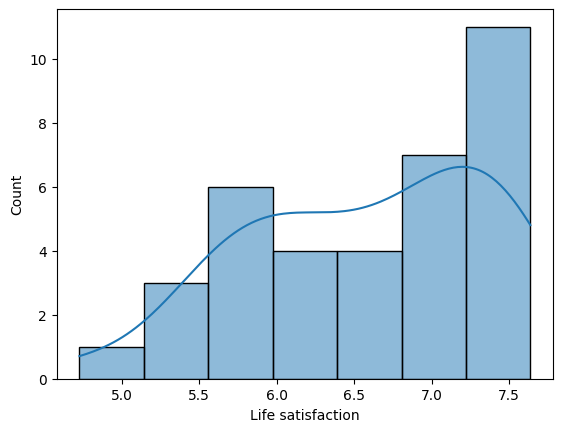

In [26]:
sns.histplot(x = "Life satisfaction", data = df_lifesat, kde = True)

Si queremos contestar a la pregunta ¿cuál es la probabilidad de que un país tenga una "Life satisfaction" por debajo de 5.5, tendremos que integrar la curva estimada entre $-\infty$ y $5.5$:

[¿Por qué menos infinito y no el mínimo de los valores, porque estamos usando una curva aproximada entre esos rangos y no los valores exactos. Sí eso quiere decir que obtendremos un valor aproximado de la probabilidad]

$$p(\text{Life Satisfaction }\leq 5.5) = \int_{-\infty}^{5.5} f(x) \: \mathrm{d}x\ , \text{donde }f(x)\text{ es la función densidad de probabilidad estimada}$$



Pues antes de que te asustes, utilizaremos las bibliotecas de Python para hacer la estimación de esas integrales por ti.

### Estimación de probabilidades de rangos de variables continuas

El procedimiento es análogo al comentado pero usando Python:

In [28]:
#1 Obtenemos la estimación de la función densidad de probabilidad de la variable numérica

from scipy.stats import gaussian_kde # Usamos este estimador, ojo no estima Kde gaussianos usa un metodo basado en gaussianas, que no es lo mismo

f_densidad = gaussian_kde(df_lifesat["Life satisfaction"])


In [29]:
#2 Definimos los rangos de intregación
rango_min = -np.infty
rango_max = 5.5

In [31]:
#3 Integramos
from scipy.integrate import quad # Utiliza un método de integración numérico sobre el que no vamos a profundizar :-/

probabilidad,_ = quad(f_densidad, rango_min, rango_max)

#4 mostramos el resultado
print(probabilidad)

0.11246323841562424


$$p(\text{Life Satisfaction }\leq 5.5) = \int_{-\infty}^{5.5} f(x) \: \mathrm{d}x\ \approx 0.112$$

Que es un valor bastante consistente viendo la distribución de la figura anterior.

Para la otra pregunta, "probabilidad de que escogiendo un país al azar su satisfación esté entre 6.5 y 7.5"

$$p(\text{Life Satisfaction }\in [6.5,7.5]) = \int_{6.5}^{7.5} f(x) \: \mathrm{d}x$$

Aprovechamos que ya hemos estimados su función densidad y simplemente tenemos que cambiar los rangos y volver a integrar:

In [32]:
rango_min = 6.5
rango_max = 7.5
probabilidad,_ = quad(f_densidad, rango_min, rango_max)
print(probabilidad)

0.4060194849627095


$$p(\text{Life Satisfaction }\in [6.5,7.5]) = \int_{6.5}^{7.5} f(x) \: \mathrm{d}x\ \approx 0.406$$